In [1]:
# Global imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import analysis as an

# Connectivity Analysis


In [2]:
from pathlib import Path

data_folder = Path.cwd() / '..' / 'data'
data_folder = data_folder.resolve()
[x for x in sorted(data_folder.iterdir()) if x.is_dir()]

[PosixPath('/home/vene/Code/tkn/walker/data/2017-12-21-001108')]

In [3]:
df = an.get_iperf_folder(data_folder / '2017-12-21-001108', recursive=True)
# df = an.get_iperf_folder(data_folder / '2017-12-12-111553', recursive=True)

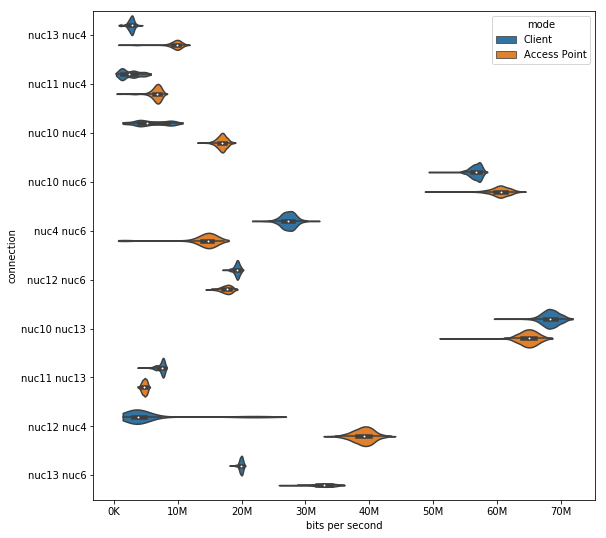

In [4]:
fig, ax = plt.subplots(figsize=(9,9))
sns.violinplot(
    x='bits per second',
    y='connection',
    data=df,
    hue='mode',
#     split=True,
    cut=0
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)

# Map

In [5]:
from bokeh.io import push_notebook, show, output_notebook
output_notebook()


Loading BokehJS ...

In [6]:
import networkx as nx
import twistmap

G = nx.DiGraph()
G.add_nodes_from(twistmap.node_positions.keys())
means = df.groupby(['server', 'client'])['server bits per second'].mean().to_dict()
for key in means:
    G.add_edge(key[0], key[1], {'weight': means[key]})

In [7]:
plot = twistmap.create_map()
twistmap.draw_graph(plot, G)
show(plot, notebook_handle=True);